# Assignment 1 - Probability, Linear Algebra, & Computational Programming

## *BARBARA FLORES RIOS*
Netid: bpf17

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus for additional information.

Instructions for all assignments can be found [here](https://kylebradbury.github.io/ids705/notebooks/assignment_instructions.html), and are also linked to from the course syllabus.

Total points in the assignment add up to 90; an additional 10 points are allocated to professionalism and presentation quality.

#  Learning Objectives
The purpose of this assignment is to provide a refresher on fundamental concepts that we will use throughout this course and provide an opportunity to develop skills in any of the related skills that may be unfamiliar to you. Through the course of completing this assignment, you will... 

- Refresh you knowledge of probability theory including properties of random variables, probability density functions,  cumulative distribution functions, and key statistics such as mean and variance.
- Revisit common linear algebra and matrix operations and concepts such as matrix multiplication, inner and outer products, inverses, the Hadamard (element-wise) product, eigenvalues and eigenvectors, orthogonality, and symmetry.
- Practice numerical programming, core to machine learning, by loading and filtering data, plotting data, vectorizing operations, profiling code speed, and debugging and optimizing performance. You will also practice computing probabilities based on simulation.
- Develop or refresh your knowledge of Git version control, which will be a core tool used in the final project of this course
- Apply your skills altogether through an exploratory data analysis to practice data cleaning, data manipulation, interpretation, and communication 

We will build on these concepts throughout the course, so use this assignment as a catalyst to deepen your knowledge and seek help with anything unfamiliar.

If some references would be helpful on these topics, I would recommend the following resources:
- [Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf) by Deisenroth, Faisal, and Ong
- [Deep Learning](https://www.deeplearningbook.org/); Part I: Applied Math and Machine Learning Basics by Goodfellow, Bengio, and Courville
- [The Matrix Calculus You Need For Deep Learning](https://arxiv.org/pdf/1802.01528.pdf) by Parr and Howard
- [Dive Into Deep Learning](https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/index.html); Appendix: Mathematics for Deep Learning by Weness, Hu, et al.

*Note: don't worry if you don't understand everything in the references above - some of these books dive into significant minutia of each of these topics.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

---

# Probability and Statistics Theory

*Note: for all assignments, write out equations and math using markdown and [LaTeX](https://tobi.oetiker.ch/lshort/lshort.pdf). I recommend that you complete the work on paper before typing up the final version. For this assignment show your math for questions 1-4, meaning that you should include any intermediate steps necessary to understand the logic of your solution. Most can be completed in 3-4 steps. Being proficient in expressing yourself clearly, sometimes mathematically, is a valuable skill to have as a data scientist*

## 1
**[3 points]**  
Let $f(x) = \begin{cases}
                0           & x < 0  \\
                \alpha x^2  & 0 \leq x \leq 2 \\
                0           & 2 < x
            \end{cases}$
            
For what value of $\alpha$ is $f(x)$ a valid probability density function?

**ANSWER**

>To calculate the value of $\alpha$ , we need to consider that the area under the curve of the probability density function should be equal to 1.
>
>So, first, we proceed to calculate the integral of the function. We won't consider the constants in the integral since we have defined the limits at which we want to evaluate it.
>
>Let $f'(x) = \begin{cases}
>                0           & x < 0  \\
>                \frac{1}{3} \alpha x^3  & 0 \leq x \leq 2 \\
>                0          & 2 < x
>            \end{cases}$


>The area under the curve of $f(x)$ is 0 when $x < 0$ and when $x > 2$, so we will only consider the interval $0 \leq x \leq 2$.
>So we calculate the following:
>
>
>$$\
>\int_{0}^{2} \alpha x^2 \,dx = \frac{1}{3} \alpha x^3 \Big|_{0}^{2} = 1
>$$
>
>$$
>\frac{\alpha}{3}(2)^3 -  \frac{\alpha}{3}(0)^3   = 1
>$$
>
>$$
>\frac{8\alpha}{3} = 1
>$$
>
>$$
>\alpha = \frac{3}{8}
>$$
>
>So, in the end, we obtain that $\alpha = \frac{3}{8}$ to ensure that our probability density function is valid.

---

## 2
**[3 points]** What is the cumulative distribution function (CDF) that corresponds to the following probability distribution function? Please state the value of the CDF for all possible values of $x$.

$f(x) = \begin{cases}
    \frac{1}{3} & 0 < x < 3 \\
    0           & \text{otherwise}
    \end{cases}$

**ANSWER**

> The cumulative distribution function would be the integral of the probability distribution function between $-\infty$ and x
>
>Let's consider the interval $-\infty < x < 0$.
>
>$$
>\int_{-\infty}^{x} 0 \  dx  = 0
>$$

>Let's consider the interval $-\infty < x < 3$.
>
>$$
>\int_{-\infty}^{0} 0 \  dx + \int_{0}^{x} \frac{1}{3}\,dx
>$$
>$$ 
>= 0 + \frac{1}{3}x \Big|_{0}^{x}  
>$$
>$$ 
>= \frac{1}{3}(x) -  \frac{1}{3}(0)
>$$
>$$ 
>= \frac{1}{3}x 
>$$
 


>Let's consider the interval $3 < x $.
>
>$$
>\int_{-\infty}^{0} 0 \  dx + \int_{0}^{3} \frac{1}{3}\,dx  + \int_{3}^{x} 0 \  dx 
>$$
>$$ 
>= 0 + \frac{1}{3}x \Big|_{0}^{3}  + 0
>$$
>$$ 
>= \frac{1}{3}(3) -  \frac{1}{3}(0)
>$$
>$$ 
>= 1
>$$
 

> So, our cumulative distribution function (CDF) would be:
>
>$CDF = F(x) = \begin{cases}
    0           & x < 0 \\
    \frac{x}{3} & 0 < x < 3 \\
    1           & 3 < x
    \end{cases}$

---

## 3
**[6 points]** For the probability distribution function for the random variable $X$,

$f(x) = \begin{cases}
    \frac{1}{3} & 0 < x < 3 \\
    0           & \text{otherwise}
    \end{cases}$
    
what is the (a) expected value and (b) variance of $X$. *Show all work*.

**ANSWER**

>a)
>$$
>E(X) = \int_{-\infty}^{\infty} xf(x) \  dx
>$$ 
>
>$$
>E(X) =\int_{-\infty}^{0} xf(x)  \  dx + \int_{0}^{3} xf(x) \,dx  + \int_{3}^{x} xf(x)  \  dx 
>$$
>
>$$
>E(X) =\int_{-\infty}^{0} x*0  \  dx + \int_{0}^{3} x\frac{1}{3} \,dx  + \int_{3}^{x} x*0  \  dx 
>$$
>$$
>E(X) =0  + \frac{1}{6}x^2 \Big|_{0}^{3}  + 0
>$$
>
>$$
>E(X) = \frac{1}{6}(3)^2 - \frac{1}{6}(0)^2
>$$
>$$
>E(X) = \frac{3}{2} 
>$$

>b)
>$$
>\sigma^2 = E[(X-\mu)^2] 
>$$ 
>$$
>\sigma^2 = E(X^2) -  [E(X)]^2
>$$ 

> Since we have already calculated the value of $E(x)$ in the previous exercise, the only thing left is to calculate the value of $E(X^2)$
>
>$$
>E(X^2) = \int_{-\infty}^{\infty} x^2f(x) \  dx
>$$ 
>
>$$
>E(X^2) =\int_{-\infty}^{0} x^2f(x)  \  dx + \int_{0}^{3} x^2f(x) \,dx  + \int_{3}^{x} x^2f(x)  \  dx 
>$$
>
>$$
>E(X^2) =\int_{-\infty}^{0} x^2*0  \  dx + \int_{0}^{3} x^2\frac{1}{3} \,dx  + \int_{3}^{x} x^2*0  \  dx 
>$$
>$$
>E(X^2) =0  + \frac{1}{9}x^3 \Big|_{0}^{3}  + 0
>$$
>
>$$
>E(X^2) = \frac{1}{9}(3)^3 - \frac{1}{9}(0)^3
>$$
>$$
>E(X^2) = 3
>$$

>Finally, we substitute into the variance formula, and we have that
>$$
>\sigma^2 = E(X^2) -  [E(X)]^2
>$$ 
>$$
>\sigma^2 = 3 -  (\frac{3}{2} )^2
>$$ 
>$$
>\sigma^2 = \frac{3}{4} 
>$$ 

## 4
**[6 points]** 
You are given the training data below and asked to determine the probability that a sample of $x=0.54$ comes from class 1, or equivalently, $P(Y=1|X=0.54)$. The feature, $x$, can take on real values between 0 and 1.

| $x$ value range | Negative data samples ($x$,$y=0$) | Positive data samples ($x$,$y=1$) |
| -- | -- | -- |
| 0.0 - 0.1 | (0.05,0),(0.07,0)|   None   |
| 0.1 - 0.2 | (0.11,0),(0.13,0),(0.19,0) | (0.14,1) |
| 0.2 - 0.3 | (0.23,0) | (0.24,1) |
| 0.3 - 0.4 | (0.35,0), (0.37,0)| (0.32,1) |
| 0.4 - 0.5 | (0.49,0) | (0.47,1) |
| 0.5 - 0.6 | (0.51,0) | (0.53,1) |
| 0.6 - 0.7 |   None   | (0.61,1) |
| 0.7 - 0.8 |   None   | (0.77,1) |
| 0.8 - 0.9 |   None   | (0.83,1) |
| 0.9 - 1.0 |   None   | (0.92,1),(0.98,1) |

Note: *You don't need to use these data directly*, but this provides an example of how the data could be distributed to form the empirical likelihoods and priors shown below.

You're likely familiar with Bayes' Rule, which for discrete random variables states that:

\begin{equation*}
P(Y|X)= \frac{P(X|Y)P(Y)}{P(X)}
\end{equation*}

Additionally, $P(X) = \sum_y P(X|Y=y)P(Y=y)$

In our case, however, the variable Y is discrete but the variable X is continuous, so we express this function a bit differently. We can compute the poster probability, $P(Y|X)$, based on the likelihood function of the data conditioned on the class of the samples, $f_{X|Y}(x,y)$, the prior $P(Y)$ which is essentially the distribution of the class labels across all the data, and the evidence $f_X(x)$ which is the probability distribution function of the features, $X$, regardless of class labels:


\begin{equation*}
P(Y=y|X=x)= \frac{f_{X|Y}(x,y)P(Y=y)}{f_X(x)}
\end{equation*}

Also, note that $f_X(x)$ can be computed in this case (due to the discrete Y values of 0 and 1) as:

\begin{equation*}
f_X(x) = f_{X|Y}(x,y=0)P(Y=0) + f_{X|Y}(x,y=1)P(Y=1)
\end{equation*}

Below are the prior and the likelihood functions based on the dataset above. Note that here we use $P(\cdot)$ to note a probability and $f(\cdot)$ to note a probability distribution function.

<img src="img/a1_py.png" width=400>

<img src="img/a1_pxy.png"  width="600">

1. What is $f_{X|Y}(x=0.54,y=1)P(Y=1)$?
2. What is $f_X(x=0.54)$?
3. What is $P(Y=1|X=0.54)$?

*Show each value you use for each computation.*

**ANSWER**

>
>1. 
>
>First, given the first graph, we know that
>
>$P(Y=0) = \frac{1}{3}$ 
>
>$P(Y=1) = \frac{2}{3}$ 
>
>On the other hand, in the second graph, we can see that:
>
>$f_{X|Y}(x=0.54,y=1) = 1$
>
>therefore:
>
> $f_{X|Y}(x=0.54,y=1)P(Y=1) = 1 * \frac{2}{3}$  
>
> $f_{X|Y}(x=0.54,y=1)P(Y=1) = \frac{2}{3}$

> 2
>
>\begin{equation*}
>f_X(x) = f_{X|Y}(x,y=0)P(Y=0) + f_{X|Y}(x,y=1)P(Y=1)
>\end{equation*}
>
>\begin{equation*}
>f_X(x=0.54) = 1*\frac{1}{3} + 1*\frac{2}{3}
>\end{equation*}
>
>\begin{equation*}
>f_X(x=0.54) = 1
>\end{equation*}

>3
>
>given
>\begin{equation*}
>P(Y=y|X=x)= \frac{f_{X|Y}(x,y)P(Y=y)}{f_X(x)}
>\end{equation*}
>
>Then:
>
>\begin{equation*}
>P(Y=1|X=0.54)= \frac{f_{X|Y}(x=0.54,y=1)P(Y=1)}{f_X(x=0.54)}   
>\end{equation*}
>
>\begin{equation*}
>P(Y=1|X=0.54)= \frac{\frac{2}{3}}{1}   
>\end{equation*}
>
>\begin{equation*}
>P(Y=1|X=0.54)= \frac{2}{3} 
>\end{equation*}


---

# Linear Algebra

# 5

**[5 points]** A common task in machine learning is a change of basis: transforming the representation of our data from one space to another. A prime example of this is through the process of dimensionality reduction as in Principle Components Analysis where we often seek to transform our data from one space (of dimension $n$) to a new space (of dimension $m$) where $m<n$. Assume we have a sample of data of dimension $n=4$ (as shown below) and we want to transform it into a dimension of $m=2$.

$\mathbf{x} =  \begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4 
\end{bmatrix}$

(a) What are the dimensions of a matrix, $\mathbf{A}$, that would linearly transform our sample of data, $\mathbf{x}$, into a space of $m=2$ through the operation $\mathbf{Ax}$?

(b) Express this transformation in terms of the components of $\mathbf{x}$: $x_1$, $x_2$, $x_3$, $x_4$ and the matrix $\mathbf{A}$ where each entry in the matrix is denoted as $a_{i,j}$ (e.g. the entry in the first row and second column would be $a_{1,2}$). Your answer will be in the form of a matrix expressing result of the product $\mathbf{Ax}$.

*Note: please write your answers here in LaTeX*

**ANSWER**

>a)  Let $\mathbf{y}$ be the matrix resulting from the transformation of $\mathbf{x}$ into a space of $m=2$. 
>
>$\mathbf{y}$ will have dimensions 2x1
>
>$\mathbf{y} =  \begin{bmatrix}
>y_1 \\
>y_2 
>\end{bmatrix}$
>
> Then, 
>
>$\mathbf{Ax} = \mathbf{y}$
>
>$A\begin{bmatrix}
>x_1 \\
>x_2 \\
>x_3 \\
>x_4 
>\end{bmatrix}$ $ = \begin{bmatrix}
>y_1 \\
>y_2 
>\end{bmatrix}$
>
>So **$\mathbf{A}$ should have dimensions 2x4**. 
>
>In this way, it is ensured that the resulting matrix from the multiplication of $\mathbf{A}$ (2x4) by $\mathbf{x}$ (4x1) is $\mathbf{y}$ with dimensions 2x1.



>b)
>
>$\begin{bmatrix}
>a_{11} & a_{12} & a_{13} & a_{14} \\
>a_{21} & a_{22} & a_{23} & a_{24}
>\end{bmatrix}$ $\begin{bmatrix}
>x_1 \\
>x_2 \\
>x_3 \\
>x_4 
>\end{bmatrix}$  $ = \begin{bmatrix}
>y_1 \\
>y_2 
>\end{bmatrix}$
>
>$\begin{bmatrix}
>a_{11} & a_{12} & a_{13} & a_{14} \\
>a_{21} & a_{22} & a_{23} & a_{24}
>\end{bmatrix}$ $\begin{bmatrix}
>x_1 \\
>x_2 \\
>x_3 \\
>x_4 
>\end{bmatrix}$  $ = \begin{bmatrix}
>a_{11}x_1 + a_{12}x_2 + a_{13}x_3 + a_{14}x_4 \\
>a_{21}x_1 + a_{22}x_2 + a_{23}x_3 + a_{24}x_4 
>\end{bmatrix}$

---

## 6
**[14 points]** **Matrix manipulations and multiplication**. Machine learning involves working with many matrices, so this exercise will provide you with the opportunity to practice those skills.

Let
$\mathbf{A} =  \begin{bmatrix}
1 & 2 & 3 \\
2 & 4 & 5 \\
3 & 5 & 6 
\end{bmatrix}$, $\mathbf{b} =  \begin{bmatrix}
-1  \\
3  \\
8  
\end{bmatrix}$, $\mathbf{c} =  \begin{bmatrix}
4  \\
-3  \\
6  
\end{bmatrix}$, and $\mathbf{I} =  \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 
\end{bmatrix}$

Compute the following **using Python** or indicate that it cannot be computed. Refer to NumPy's tools for handling matrices. While all answers should be computer using Python, your response to whether each item can be computed should refer to underlying linear algebra. There may be circumstances when Python will produce an output, but based on the dimensions of the matrices involved, the linear algebra operation is not possible. **For the case when an operation is invalid, explain why it is not.**

When the quantity can be computed, please provide both the Python code AND the output of that code (this need not be in LaTex)

1. $\mathbf{A}\mathbf{A}$
2. $\mathbf{A}\mathbf{A}^T$
3. $\mathbf{A}\mathbf{b}$
4. $\mathbf{A}\mathbf{b}^T$
5. $\mathbf{b}\mathbf{A}$
6. $\mathbf{b}^T\mathbf{A}$
7. $\mathbf{b}\mathbf{b}$
8. $\mathbf{b}^T\mathbf{b}$
9. $\mathbf{b}\mathbf{b}^T$
10. $\mathbf{b} + \mathbf{c}^T$
11. $\mathbf{b}^T\mathbf{b}^T$
12. $\mathbf{A}^{-1}\mathbf{b}$
13. $\mathbf{A}\circ\mathbf{A}$
14. $\mathbf{b}\circ\mathbf{c}$

*Note: The element-wise (or Hadamard) product is the product of each element in one matrix with the corresponding element in another matrix, and is represented by the symbol "$\circ$".*

In [2]:
A = np.array([[1, 2, 3], [2, 4, 5], [3, 5, 6]])
b = np.array([[-1], [3], [8]])
c = np.array([[4], [-3], [6]])
I = np.identity(3)

In [3]:
print(f"1. AA =\n\n{A@A}")

1. AA =

[[14 25 31]
 [25 45 56]
 [31 56 70]]


In [4]:
print(f"2. AA.T =\n\n{A@A.T}")

2. AA.T =

[[14 25 31]
 [25 45 56]
 [31 56 70]]


In [5]:
print(f"3. Ab =\n\n{A@b}")

3. Ab =

[[29]
 [50]
 [60]]


>4. $\mathbf{A}\mathbf{b}^T$
>
>It is not possible to multiply A by the transpose of b since the dimensions of the first matrix are 3x3, and the dimensions of the second matrix are 1x3. Matrix multiplication is defined only when the number of columns in the first matrix is equal to the number of rows in the second matrix.
>
>5. $\mathbf{b}\mathbf{A}$
>
>It is not possible to multiply b by A since the dimensions of the first matrix are 3x1, and the dimensions of the second matrix are 3x3. Matrix multiplication is defined only when the number of columns in the first matrix is equal to the number of rows in the second matrix

In [6]:
print(f"6. b.TA =\n\n{b.T@A}")

6. b.TA =

[[29 50 60]]


>7. $\mathbf{b}\mathbf{b}$
>
>It is not possible to multiply b by b since the dimensions of the first matrix are 3x1, and the dimensions of the second matrix are 3x1. Matrix multiplication is defined only when the number of columns in the first matrix is equal to the number of rows in the second matrix

In [7]:
print(f"8. b.Tb =\n\n{b.T@b}")

8. b.Tb =

[[74]]


In [8]:
print(f"9. bb.T =\n\n{b@b.T}")

9. bb.T =

[[ 1 -3 -8]
 [-3  9 24]
 [-8 24 64]]


>10. $\mathbf{b} + \mathbf{c}^T$
>
>It is not possible to add b and the transpose of c because they have dimensions 3x1 and 1x3, respectively. In order to add them, they would need to have the same dimensions.
>
>11. $\mathbf{b}^T\mathbf{b}^T$
>
>It is not possible to multiply the transpose of by the transpose of b since the dimensions of the first matrix are 1x3, and the dimensions of the second matrix are 1x3. Matrix multiplication is defined only when the number of columns in the first matrix is equal to the number of rows in the second matrix

In [9]:
print(f"12. A^(-1)b  =\n\n{np.linalg.inv(A)@b}")

12. A^(-1)b  =

[[ 6.]
 [ 4.]
 [-5.]]


In [10]:
print(f"13. A*A  =\n\n{A*A}")

13. A*A  =

[[ 1  4  9]
 [ 4 16 25]
 [ 9 25 36]]


In [11]:
print(f"14. b*c  =\n\n{b*c}")

14. b*c  =

[[-4]
 [-9]
 [48]]


**ANSWER**

---

## 7
**[8 points]** **Eigenvectors and eigenvalues**. Eigenvectors and eigenvalues are useful for some machine learning algorithms, but the concepts take time to solidly grasp. They are used extensively in machine learning and in this course we will encounter them in relation to Principal Components Analysis (PCA), clustering algorithms, For an intuitive review of these concepts, explore this [interactive website at Setosa.io](http://setosa.io/ev/eigenvectors-and-eigenvalues/). Also, the series of linear algebra videos by Grant Sanderson of 3Brown1Blue are excellent and can be viewed on youtube [here](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab). For these questions, numpy may once again be helpful.

1. Calculate the eigenvalues and corresponding eigenvectors of matrix $\mathbf{A}$ above, from the last question.
2. Choose one of the eigenvector/eigenvalue pairs, $\mathbf{v}$ and $\lambda$, and show that $\mathbf{A} \mathbf{v} = \lambda \mathbf{v}$. This relationship extends to higher orders: $\mathbf{A} \mathbf{A} \mathbf{v} = \lambda^2 \mathbf{v}$
3. Show that the eigenvectors are orthogonal to one another (e.g. their inner product is zero). This is true for eigenvectors from real, symmetric matrices. In three dimensions or less, this means that the eigenvectors are perpendicular to each other. Typically we use the orthogonal basis of our standard x, y, and z, Cartesian coordinates, which allows us, if we combine them linearly, to represent any point in a 3D space. But any three orthogonal vectors can do the same. We will see this property is used in PCA to identify the dimensions of greatest variation in our data when we discuss dimensionality reduction.

**ANSWER**

In [12]:
# 1
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigenvalues of A:")
print(eigenvalues)

print("\nEigenvectors of A:")
print(eigenvectors)

Eigenvalues of A:
[11.34481428 -0.51572947  0.17091519]

Eigenvectors of A:
[[-0.32798528 -0.73697623  0.59100905]
 [-0.59100905 -0.32798528 -0.73697623]
 [-0.73697623  0.59100905  0.32798528]]


In [13]:
# 2
# We will use the first eigenvalue
λ = eigenvalues[0]

# And the first eigenvector
v = eigenvectors[:, 0].reshape(3, 1)

print("Let's check Av = λv")
print(f"\nAv =\n{A @ v}")
print(f"\nλv =\n{λ * v}")

print("\n\nNow AAv = λ^2v")
print(f"\nAAv =\n{A @ (A @ v)}")
print(f"\nλ^2v =\n{λ**2 * v}")

Let's check Av = λv

Av =
[[-3.72093206]
 [-6.70488789]
 [-8.36085845]]

λv =
[[-3.72093206]
 [-6.70488789]
 [-8.36085845]]


Now AAv = λ^2v

AAv =
[[-42.2132832 ]
 [-76.06570795]
 [-94.85238636]]

λ^2v =
[[-42.2132832 ]
 [-76.06570795]
 [-94.85238636]]


In [14]:
print(
    "Let's check if the eigenvectors are orthogonal to each other. To do this, we will verify if their dot product is 0\n"
)

v1 = eigenvectors[:, 0]
v2 = eigenvectors[:, 1]
v3 = eigenvectors[:, 2]

print(f"v1.v2: {np.dot(v1, v2)}")
print(f"v2.v3: {np.dot(v2, v3)}")
print(f"v1.v3: {np.dot(v1, v3)}")

Let's check if the eigenvectors are orthogonal to each other. To do this, we will verify if their dot product is 0

v1.v2: 3.5330797728269967e-16
v2.v3: -6.1377913704128e-16
v1.v3: -4.778175388788784e-16


>We can see that the inner product or dot product between the eigenvectors is close to zero. Therefore, we can validate with this that the eigenvectors are orthogonal to each other.

---

# Numerical Programming

## 8
**[10 points]** Loading data and gathering insights from a real dataset

In data science, we often need to have a sense of the idiosyncrasies of the data, how they relate to the questions we are trying to answer, and to use that information to help us to determine what approach, such as machine learning, we may need to apply to achieve our goal. This exercise provides practice in exploring a dataset and answering question that might arise from applications related to the data.

**Data**. The data for this problem can be found in the `data` subfolder in the `assignments` folder on [github](https://github.com/kylebradbury/ids705). The filename is `a1_egrid2016.xlsx`. This dataset is the Environmental Protection Agency's (EPA) [Emissions & Generation Resource Integrated Database (eGRID)](https://www.epa.gov/energy/emissions-generation-resource-integrated-database-egrid) containing information about all power plants in the United States, the amount of generation they produce, what fuel they use, the location of the plant, and many more quantities. We'll be using a subset of those data.

The fields we'll be using include:					
    
|field    |description|
|:-----   |:-----|
|SEQPLT16 |eGRID2016 Plant file sequence number (the index)| 
|PSTATABB |Plant state abbreviation|
|PNAME    |Plant name |
|LAT      |Plant latitude |
|LON      |Plant longitude|
|PLPRMFL  |Plant primary fuel |
|CAPFAC   |Plant capacity factor |
|NAMEPCAP |Plant nameplate capacity (Megawatts MW)|
|PLNGENAN |Plant annual net generation (Megawatt-hours MWh)|
|PLCO2EQA |Plant annual CO2 equivalent emissions (tons)|

For more details on the data, you can refer to the [eGrid technical documents](https://www.epa.gov/sites/default/files/2021-02/documents/egrid2019_technical_guide.pdf). For example, you may want to review page 45 and the section "Plant Primary Fuel (PLPRMFL)", which gives the full names of the fuel types including WND for wind, NG for natural gas, BIT for Bituminous coal, etc.

There also are a couple of "gotchas" to watch out for with this dataset:
- The headers are on the second row and you'll want to ignore the first row (they're more detailed descriptions of the headers).
- NaN values represent blanks in the data. These will appear regularly in real-world data, so getting experience working with these sorts of missing values will be important.

**Your objective**. For this dataset, your goal is to answer the following questions about electricity generation in the United States:

**(a)** Which plant has generated the most energy (measured in MWh)?

**(b)** What is the name of the northern-most power plant in the United States?

**(c)** What is the state where the northern-most power plant in the United States is located?

**(d)** Plot a bar plot showing the amount of energy produced by each fuel type across all plants. 

**(e)** From the plot in (d), which fuel for generation produces the most energy (MWh) in the United States?

**ANSWER**

In [15]:
path_a1_egrid2016 = "a1_egrid2016.xlsx"
df_power_plants_us = pd.read_excel(path_a1_egrid2016, skiprows=1)
print("shape:", df_power_plants_us.shape)
df_power_plants_us.head()

shape: (9709, 10)


,SEQPLT16,PSTATABB,PNAME,LAT,LON,PLPRMFL,CAPFAC,NAMEPCAP,PLNGENAN,PLCO2EQA
0,1,AK,7-Mile Ridge Wind Project,63.210689,-143.247156,WND,NaN,1.8,NaN,NaN
1,2,AK,Agrium Kenai Nitrogen Operations,60.673200,-151.378400,NG,NaN,21.6,NaN,NaN
2,3,AK,Alakanuk,62.683300,-164.654400,DFO,0.05326,2.6,1213.001,1049.863
3,4,AK,Allison Creek Hydro,61.084444,-146.353333,WAT,0.01547,6.5,881.000,0.000
4,5,AK,Ambler,67.087980,-157.856719,DFO,0.13657,1.1,1315.999,1087.881


In [16]:
print(
    "Given that the questions refer to the amount of energy from the plant, we will address the NAs obtained for this variable."
)
print(
    df_power_plants_us["PLNGENAN"].isna().sum(),
    "Missing values for the variable 'PLNGENAN'",
)

Given that the questions refer to the amount of energy from the plant, we will address the NAs obtained for this variable.
1671 Missing values for the variable 'PLNGENAN'


In [17]:
df_power_plants_us = df_power_plants_us.dropna(subset=["PLNGENAN"])
print("shape:", df_power_plants_us.shape)

shape: (8038, 10)


In [18]:
# a)
max_energy = df_power_plants_us[
    df_power_plants_us["PLNGENAN"] == max(df_power_plants_us["PLNGENAN"])
]
max_energy

,SEQPLT16,PSTATABB,PNAME,LAT,LON,PLPRMFL,CAPFAC,NAMEPCAP,PLNGENAN,PLCO2EQA
390,391,AZ,Palo Verde,33.3881,-112.8617,NUC,0.87801,4209.6,3.237748e+07,0.0


In [19]:
id_max_energy = max_energy[["SEQPLT16"]].iloc[0, 0]
name_max_energy = max_energy[["PNAME"]].iloc[0, 0]
value_max_energy = round(max_energy[["PLNGENAN"]].iloc[0, 0])
print(
    f"The plant that has generated the most energy is {id_max_energy}: '{name_max_energy}' with a total generation {value_max_energy:,} of MWh in a year."
)

The plant that has generated the most energy is 391: 'Palo Verde' with a total generation 32,377,477 of MWh in a year.


In [20]:
# b)
northern_most = df_power_plants_us[
    df_power_plants_us["LAT"] == max(df_power_plants_us["LAT"])
]
northern_most

,SEQPLT16,PSTATABB,PNAME,LAT,LON,PLPRMFL,CAPFAC,NAMEPCAP,PLNGENAN,PLCO2EQA
11,12,AK,Barrow,71.292,-156.7786,NG,0.28208,20.3,50162.0,44205.17


In [21]:
id_northern_most = northern_most[["SEQPLT16"]].iloc[0, 0]
name_northern_most = northern_most[["PNAME"]].iloc[0, 0]
value_northern_most = round(northern_most[["PLNGENAN"]].iloc[0, 0])
print(
    f"The northern-most power plant is {id_northern_most}: '{name_northern_most}' with a total generation {value_northern_most:,} of MWh in a year."
)

The northern-most power plant is 12: 'Barrow' with a total generation 50,162 of MWh in a year.


In [22]:
# c)
state_northern_most = northern_most[["PSTATABB"]].iloc[0, 0]
print(
    f"The state where the northern-most power plant in the United States is located is: {state_northern_most}"
)

The state where the northern-most power plant in the United States is located is: AK


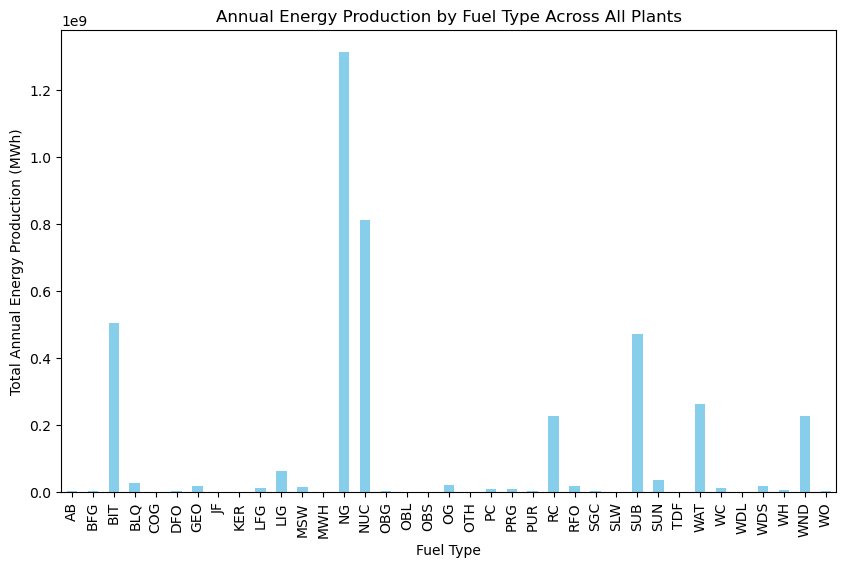

In [23]:
# d)
df_grouped_by_fuel = df_power_plants_us.groupby("PLPRMFL")["PLNGENAN"].sum()
df_grouped_by_fuel.plot(kind="bar", figsize=(10, 6), color="skyblue")
plt.title("Annual Energy Production by Fuel Type Across All Plants")
plt.xlabel("Fuel Type")
plt.ylabel("Total Annual Energy Production (MWh)")

plt.show()

> e)  From the previous bar plot, it is evident that Natural Gas (NG) produces the highest amount of energy (measured in MWh) in the United States.


---

## 9
**[6 points]** *Vectorization*. When we first learn to code and think about iterating over an array, we often use loops. If implemented correctly, that does the trick. In machine learning, we iterate over so much data that those loops can lead to significant slow downs if they are not computationally efficient. In Python, vectorizing code and relying on matrix operations with efficient tools like numpy is typically the faster approach. Of course, numpy relies on loops to complete the computation, but this is at a lower level of programming (typically in C), and therefore is much more efficient. This exercise will explore the benefits of vectorization. Since many machine learning techniques rely on matrix operations, it's helpful to begin thinking about implementing algorithms using vector forms.

Begin by creating an array of 10 million random numbers using the numpy `random.randn` module. Compute the sum of the squares of those random numbers first in a for loop, then using Numpy's `dot` module to perform an inner (dot) product. Verify that your code produces the same output in each case. Time how long it takes to compute each and report the results and report the output. How many times faster is the vectorized code than the for loop approach? (Note - your results may vary from run to run).

Your output should use the `print()` function as follows (where the # symbols represent your answers, to a reasonable precision of 4-5 significant figures):

`Time [sec] (non-vectorized): ######`

`Time [sec] (vectorized):     ######`

`The vectorized code is ##### times faster than the nonvectorized code`

**ANSWER**

In [24]:
np.random.seed(123)
m = np.random.randn(10**7)

# Bucle for
start_time_bucle = time.time()
sum_bucle = 0
for i in m:
    sum_bucle += i**2
end_time_bucle = time.time()


# Dot product
start_dot_product = time.time()
sum_dot_product = np.dot(m, m)
end_dot_product = time.time()

In [25]:
print("Let's first check that the results from both methods are equal\n")
print(f"Sum non-vectorized: {sum_bucle:.2f}")
print(f"Sum vectorized: {sum_dot_product:.2f}")

Let's first check that the results from both methods are equal

Sum non-vectorized: 10004444.54
Sum vectorized: 10004444.54


In [26]:
time_non_vectorized = end_time_bucle - start_time_bucle
time_vectorized = end_dot_product - start_dot_product

print(f"Time [sec] (non-vectorized): {time_non_vectorized:.5g}\n")
print(f"Time [sec] (vectorized):  {time_vectorized:.5g}\n")
print(
    f"The vectorized code is {time_non_vectorized/time_vectorized:.5g} times faster than the nonvectorized code\n"
)

Time [sec] (non-vectorized): 1.3309

Time [sec] (vectorized):  0.0051351

The vectorized code is 259.18 times faster than the nonvectorized code



---

## 10
**[10 points]** This exercise will walk through some basic numerical programming and probabilistic thinking exercises, two skills which are frequently used in machine learning for answering questions from our data.
1. Synthesize $n=10^4$ normally distributed data points with mean $\mu=2$ and a standard deviation of $\sigma=1$. Call these observations from a random variable $X$, and call the vector of observations that you generate, $\textbf{x}$.
2. Calculate the mean and standard deviation of $\textbf{x}$ to validate (1) and provide the result to a precision of four significant figures.
3. Plot a histogram of the data in $\textbf{x}$ with 30 bins
4. What is the 90th percentile of $\textbf{x}$? The 90th percentile is the value below which 90% of observations can be found.
5. What is the 99th percentile of $\textbf{x}$?
6. Now synthesize $n=10^4$ normally distributed data points with mean $\mu=0$ and a standard deviation of $\sigma=3$. Call these observations from a random variable $Y$, and call the vector of observations that you generate, $\textbf{y}$.
7. Create a new figure and plot the histogram of the data in $\textbf{y}$ on the same axes with the histogram of $\textbf{x}$, so that both histograms can be seen and compared.
8. Using the observations from $\textbf{x}$ and $\textbf{y}$, estimate $E[XY]$

**ANSWER**

In [27]:
# 1.
np.random.seed(123)
x = np.random.normal(2, 1, 10**4)
x

array([0.9143694 , 2.99734545, 2.2829785 , ..., 1.52773359, 2.58196437,
       2.97061286])

In [28]:
# 2.
print(f"μ(X): {np.mean(x):.4g}")
print(f"σ(X) {np.std(x):.4g}")

μ(X): 2.01
σ(X) 0.9981


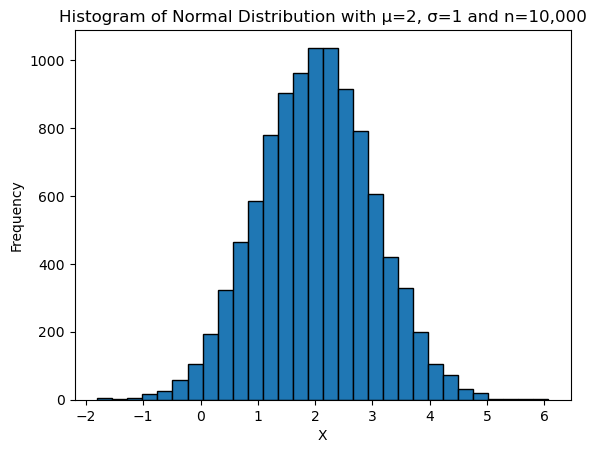

In [29]:
# 3.
plt.hist(x, bins=30, edgecolor="black")

plt.xlabel("X")
plt.ylabel("Frequency")
plt.title("Histogram of Normal Distribution with μ=2, σ=1 and n=10,000")
plt.show()

In [30]:
# 4
sorted_x = np.sort(x)
percentile_90 = sorted_x[int(0.9 * len(sorted_x))]
print(f"90th Percentile of X: {percentile_90:.4g}")

90th Percentile of X: 3.289


In [31]:
# 5
percentile_99 = sorted_x[int(0.99 * len(sorted_x))]
print(f"99th Percentile of X: {percentile_99:.4g}")

99th Percentile of X: 4.33


In [32]:
# 6
np.random.seed(123)
y = np.random.normal(0, 3, 10**4)
print(f"μ(Y): {np.mean(y):.4g}")
print(f"σ(Y) {np.std(y):.4g}")

μ(Y): 0.02914
σ(Y) 2.994


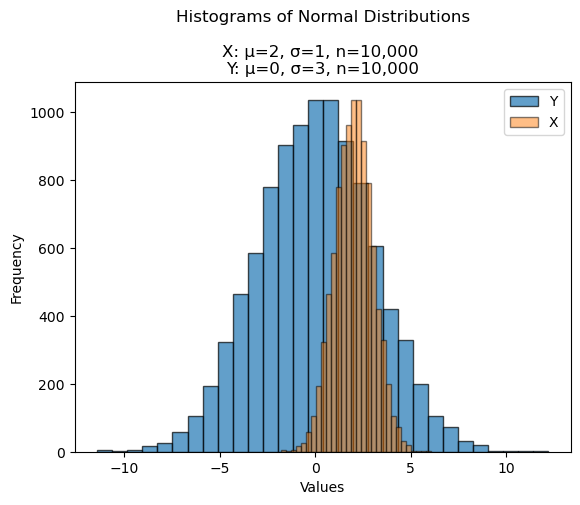

In [33]:
# 7
plt.hist(y, bins=30, edgecolor="black", alpha=0.7, label="Y")
plt.hist(x, bins=30, edgecolor="black", alpha=0.5, label="X")

plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title(
    "Histograms of Normal Distributions\n\nX: μ=2, σ=1, n=10,000 \nY: μ=0, σ=3, n=10,000"
)
plt.legend()
plt.show()

>In the plot, we can observe the difference between both distributions, characterized by different centers determined by their means and characteristic dispersions. In the case of variable Y, we can see how it has a greater dispersion and is less concentrated than X, due to its larger standard deviation. Also, it is centered at 0, its mean, in contrast to X, which has a mean of 2.

In [34]:
# 7
print(f"E[XY]: {np.mean(x * y):.4g}")

E[XY]: 3.047


>It is worth mentioning that the theoretical expectation, given the initial probabilities, should be 0, since both variables are independent.
>
>We have that $E[XY] = E[X]* E[Y] = 2*0 = 0$ 
>
>However, we must consider that we are dealing with random variables that exhibit some noise.

---

# Version Control via Git

## 11
**[4 points]** Git is efficient for collaboration, and expectation in industry, and one of the best ways to share results in academia. You can even use some Git repositories (e.g. Github) as hosts for website, such as with the [course website](https://kylebradbury.github.io/ids705/index.html). As a data scientist with experience in machine learning, Git is expected. We will interact with Git repositories (a.k.a. repos) throughout this course, and your project will require the use of git repos for collaboration.

Complete the [Atlassian Git tutorial](https://www.atlassian.com/git/tutorials/what-is-version-control), specifically the following listed sections. Try each concept that's presented. For this tutorial, instead of using BitBucket as your remote repository host, you may use your preferred platform such as [Github](https://github.com/) or [Duke's Gitlab](https://gitlab.oit.duke.edu/users/sign_in).
1. [What is version control](https://www.atlassian.com/git/tutorials/what-is-version-control)
2. [What is Git](https://www.atlassian.com/git/tutorials/what-is-git)
3. [Install Git](https://www.atlassian.com/git/tutorials/install-git)
4. [Setting up a repository](https://www.atlassian.com/git/tutorials/install-git)
5. [Saving changes](https://www.atlassian.com/git/tutorials/saving-changes)
6. [Inspecting a repository](https://www.atlassian.com/git/tutorials/inspecting-a-repository)
7. [Undoing changes](https://www.atlassian.com/git/tutorials/undoing-changes)
8. [Rewriting history](https://www.atlassian.com/git/tutorials/rewriting-history)
9. [Syncing](https://www.atlassian.com/git/tutorials/syncing)
10. [Making a pull request](https://www.atlassian.com/git/tutorials/making-a-pull-request)
11. [Using branches](https://www.atlassian.com/git/tutorials/using-branches)
12. [Comparing workflows](https://www.atlassian.com/git/tutorials/comparing-workflows)

I also have created two videos on the topic to help you understand some of these concepts: [Git basics](https://www.youtube.com/watch?v=fBCwfoBr2ng) and a [step-by-step tutorial](https://www.youtube.com/watch?v=nH7qJHx-h5s).

As an additional resource, Microsoft now offers a git [tutorial](https://learn.microsoft.com/en-us/collections/o1njfe825p602p) on this topic as well.

For your answer, affirm that you *either* completed the tutorials above OR have previous experience with ALL of the concepts above. Confirm this by typing your name below and selecting the situation that applies from the two options in brackets.

**ANSWER**

> I, **Barbara Flores*, affirm that I have **completed the above tutorial***

---

# Exploratory Data Analysis
## 12
**[15 points]** Here you'll bring together some of the individual skills that you demonstrated above and create a Jupyter notebook based blog post on your exploratory data analysis. Your goal is to identify a question or problem and to work towards solving it or providing additional information or evidence (data) related to it through your data analysis. Below, we walk through a process to follow for your analysis. Additionally, you can find an [example of a well-done exploratory data analysis here from past years](https://github.com/kylebradbury/ids705/blob/master/assignments/Assignment_1_Q12_Example.ipynb).

1. Find a dataset that interests you and relates to a question or problem that you find intriguing.
2. Describe the dataset, the source of the data, and the reason the dataset was of interest. Include a description of the features, data size, data creator and year of creation (if available), etc. What question are you hoping to answer through exploring the dataset?
3. Check the data and see if they need to be cleaned: are there missing values? Are there clearly erroneous values? Do two tables need to be merged together? Clean the data so it can be visualized. If the data are clean, state how you know they are clean (what did you check?).
3. Plot the data, demonstrating interesting features that you discover. Are there any relationships between variables that were surprising or patterns that emerged? Please exercise creativity and curiosity in your plots. You should have at least 4 plots exploring the data in different ways.
4. What insights are you able to take away from exploring the data? Is there a reason why analyzing the dataset you chose is particularly interesting or important? Summarize this for a general audience (imagine your publishing a blog post online) - boil down your findings in a way that is accessible, but still accurate.

Here your analysis will evaluated based on:
1. Motivation: was the purpose of the choice of data clearly articulated? Why was the dataset chosen and what was the goal of the analysis?
2. Data cleaning: were any issues with the data investigated and, if found, were they resolved?
3. Quality of data exploration: were at least 4 unique plots (minimum) included and did those plots demonstrate interesting aspects of the data? Was there a clear purpose and takeaway from EACH plot? 
4. Interpretation: Were the insights revealed through the analysis and their potential implications clearly explained? Was there an overall conclusion to the analysis?

**ANSWER**

>## <span style="color: #008080">PAES: A New Exam Shaping Higher Education Access in Chile</span>
>
>In November 2022, Chile introduced a new selection test for access to higher education, the "PAES: Prueba de Acceso a la Educación Superior" (Higher Education Access Test). This test replaces the "PSU: Prueba de Selección Universitaria" (University Selection Test), which had been in use for almost 20 years.
>
>One of the objectives of the test change was to improve equity in access to higher education among students from private and public schools. The new test focuses more on understanding and applying knowledge, reducing the importance of memorization of facts and formulas. The hypothesis is that this change should particularly benefit students from public schools.
>
>However, the results of the second administration of the test were published on January 2, 2024, and the media has suggested that notable disparities persist among various types of establishments.
>
>We lack access to detailed data from the previous PSU test, and considering that both tests operate on distinct scales, conducting a thorough comparison becomes challenging within the confines of this examination. That's why, in this analysis, we will focus on understanding the performance of the current test. The goal is to grasp the differences that exist today in the results of the test that determines the university future of Chilean students. Therefore, the research question we aim to address in this analysis is:
>
>***How do the results of the new Higher Education Access Test (PAES) in Chile vary across different types of educational establishments and through various socioeconomic strata?***


>### <span style="color: #008080">Database</span>
>
>This is why, in this Exploratory Data Analysis, I will examine the [database](https://datosabiertos.mineduc.cl/pruebas-de-admision-a-la-educacion-superior/) of the first PAES exam results (Ministry of Education of Chile, 2024) to identify the differences among different students and try to better understand the situation of access to higher education in Chile.
>
>In particular, we will use 2 files: "Prueba de Acceso a la Educacion Superior 2023 – Inscritos Puntajes" and "Prueba de Acceso a la Educación Superior 2023 – Socioeconómicos"
>These files contain disaggregated information at the student level, with an anonymized identifier for each person that allows connecting both databases.
>
>Both databases have 296,812 student records, with 117 and 39 columns, respectively. They each have a unique student identifier, making it possible to merge them together.
>
>These databases include information such as the school name from which the student comes, region and city, type of educational establishment (private, public, or co-financed), gender, high school GPA, scores in different selection tests, number of correct, incorrect, and omitted questions in each test type, etc. They also include information on the family's socioeconomic stratum, grouped by deciles.
>
>For the present analysis, we will use the following variables. However, the description of the 39 variables can be found on the [database page](https://datosabiertos.mineduc.cl/pruebas-de-admision-a-la-educacion-superior/).
>
>
>| Name                       | Type     | Description                                                                       | Values                                                                                                                  |
>|----------------------------- |----------|-----------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------|
>| DEPENDENCIA                  | Numeric  | Dependency group.                                                                | 1: Municipal Corporation, 2: Municipal, 3: Subsidized Private, 4: Non-subsidized Private, 5: Delegated Administration Corporation, 6: Local Education Service (SLE)   |
>| MATE1_REG_ACTUAL             | Numeric  | Score in Mathematics Competency Test 1 in the current session                     | -                                                                                                                       |
>| CLEC_REG_ACTUAL              | Numeric  | Score in Reading Competency Test in the current regular session                    | -                                                                                                                       |
>| INGRESO_PERCAPITA_GRUPO_FA   | Numeric  | What is the per capita income of your family group?                                 | 1: 1st decile, 2: 2nd decile: and so on... and 99: Prefer not to respond                                               |


>### <span style="color: #008080">Data Loading and Cleaning</span>
> 
>First, we merge the data, and then we remove null values. For the purposes of the analyses we want to perform, we will remove records with null values in the columns of dependency type, high school GPA, general mathematics test, and reading comprehension test. At the moment, we will not remove the values of 99 in the variable 'per capita income' (Prefer not to respond) since they represent a larger proportion of the database.
>

In [35]:
path_test_score = "Prueba-de-Acceso-a-la-Educacion-Superior-2023-Inscritos-Puntajes/A_INSCRITOS_PUNTAJES_2023_PAES_PUB_MRUN.csv"
test_score = pd.read_csv(path_test_score, delimiter=";", low_memory=False)
test_score.head(2)

,MRUN,ANYO_PROCESO,COD_SEXO,FECHA_NACIMIENTO,RBD,CODIGO_ENS,LOCAL_EDUCACIONAL,UNIDAD_EDUCATIVA,NOMBRE_UNIDAD_EDUC,RAMA_EDUCACIONAL,...,PRUEBA_INV_CQUI,FORMA_INV_CQUI,CORRECTAS_INV_CQUI,ERRADAS_INV_CQUI,OMITIDAS_INV_CQUI,PRUEBA_INV_CTP,FORMA_INV_CTP,CORRECTAS_INV_CTP,ERRADAS_INV_CTP,OMITIDAS_INV_CTP
0,3703667,2023,1,194708,5654,310,1747,1,INSTITUTO CLARET,H1,...,Ciencias Química.,0,0,0,0,Ciencias Técnico Profesional.,0,0,0,0
1,8437289,2023,1,194503,40407,363,3997,1,CENTRO DE ESTUDIOS BORDEMAR,H2,...,Ciencias Química.,0,0,0,0,Ciencias Técnico Profesional.,0,0,0,0


In [36]:
path_socioeconomic = "Prueba-de-Acceso-a-la-Educacion-Superior-2023-Socioeconomicos/B_SOCIOECONOMICO_DOMICILIO_2023_PAES_PUB_MRUN.csv"
socioeconomic = pd.read_csv(path_socioeconomic, delimiter=";")
socioeconomic.head(2)

,MRUN,ANYO_PROCESO,CODIGO_REGION_DOMICILIO,CODIGO_PROVINCIA_DOMICILIO,CODIGO_COMUNA_DOMICILIO,NOMBRE_COMUNA_DOMICILIO,SEXO,FECHA_NACIMIENTO,INGRESO_PERCAPITA_GRUPO_FA,RAZON_PRINCIPAL_PAES,...,USO_ESPACIO_1,USO_ESPACIO_2,USO_ESPACIO_3,USO_ESPACIO_4,USO_ESPACIO_5,USO_ESPACIO_6,USO_ESPACIO_7,USO_ESPACIO_8,TRANQUILIDAD_COLEGIO,TRABAJO_GRUPO_COLEGIO
0,3703667,2023,9,91,9101,TEMUCO,1,194708,8,1,...,0,0,0,0,0,0,0,0,9,9
1,8437289,2023,5,55,5506,NOGALES,1,194503,6,2,...,0,2,0,0,0,0,0,0,4,4


In [37]:
data = pd.merge(test_score, socioeconomic, how="inner", on="MRUN")
data.shape

(296812, 155)

In [38]:
data = data[data["MATE1_REG_ACTUAL"] != " "]
data = data[data["CLEC_REG_ACTUAL"] != " "]
data = data[data["DEPENDENCIA"] != " "]
data = data[data["DEPENDENCIA"] != " "]

data["MATE1_REG_ACTUAL"] = data["MATE1_REG_ACTUAL"].astype(int)
data["CLEC_REG_ACTUAL"] = data["CLEC_REG_ACTUAL"].astype(int)

data = data[data["MATE1_REG_ACTUAL"] > 0]
data = data[data["CLEC_REG_ACTUAL"] > 0]
data.shape

(230314, 155)

>After removing null values for our target variables, our dataset goes from 296,812 to 229,431 records. We validate that our variables do not have null values (except for the value 99 for per capita income).

In [39]:
print("Shape of the dataset:", data.shape)
print(
    "Range of MATE1_REG_ACTUAL:",
    min(data["MATE1_REG_ACTUAL"]),
    "-",
    max(data["MATE1_REG_ACTUAL"]),
)
print(
    "Range of CLEC_REG_ACTUAL:",
    min(data["CLEC_REG_ACTUAL"]),
    "-",
    max(data["CLEC_REG_ACTUAL"]),
)
print("\nValue counts for DEPENDENCIA:")
print(data["DEPENDENCIA"].value_counts().sort_index())
print("\nPercentile of Per capita income:")
print(data["INGRESO_PERCAPITA_GRUPO_FA"].value_counts().sort_index())

Shape of the dataset: (230314, 155)
Range of MATE1_REG_ACTUAL: 100 - 1000
Range of CLEC_REG_ACTUAL: 100 - 1000

Value counts for DEPENDENCIA:
1     21048
2     40680
3    126462
4     26555
5      7175
6      8394
Name: DEPENDENCIA, dtype: int64

Percentile of Per capita income:
1     40318
2     30588
3     19978
4     15730
5     12437
6     10635
7     13026
8     14615
9     11036
10    11497
99    50454
Name: INGRESO_PERCAPITA_GRUPO_FA, dtype: int64


>### <span style="color: #008080">EDA</span>
>
>Once our dataset is clean, we proceed to analyze its numbers. Firstly, we want to understand the distribution of PAES scores in the two main tests we will be investigating (Math and Reading), by type of educational establishment. Therefore, we will initially focus on understanding what proportion of students taking these tests belong to each type of establishment.
>

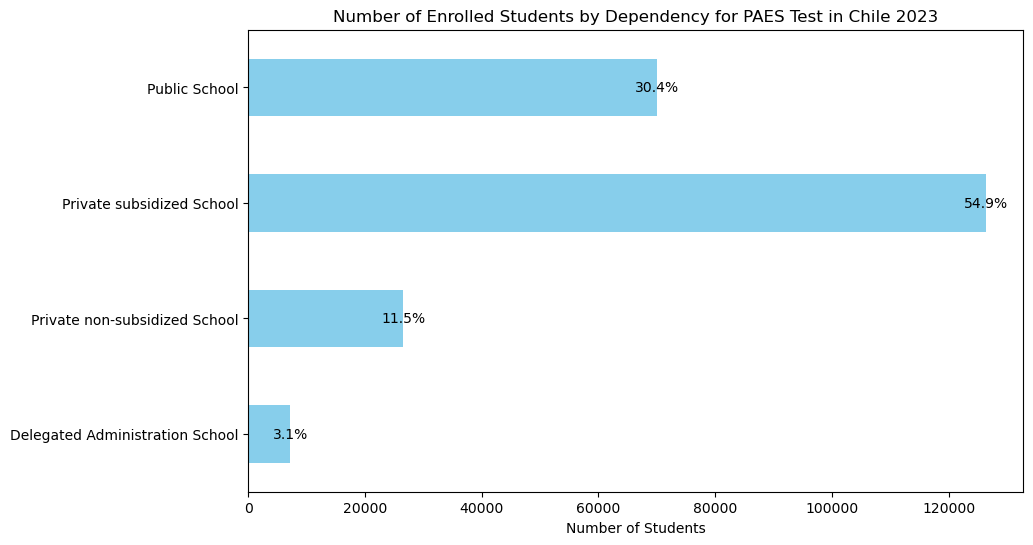

In [40]:
dependency_mapping = {
    "1": "Public School",
    "2": "Public School",
    "3": "Private subsidized School",
    "4": "Private non-subsidized School",
    "5": "Delegated Administration School",
    "6": "Public School",
}

dependency_order = [
    "Delegated Administration School",
    "Private non-subsidized School",
    "Private subsidized School",
    "Public School",
]

data["DEPENDENCY_NAME"] = data["DEPENDENCIA"].replace(dependency_mapping)
dependency_counts = data["DEPENDENCY_NAME"].value_counts()
dependency_counts = dependency_counts.reindex(dependency_order)

percentage_labels = (dependency_counts / len(data)) * 100

plt.figure(figsize=(10, 6))
bar_plot = dependency_counts.plot(kind="barh", color="skyblue")

for index, value in enumerate(dependency_counts):
    percentage_label = f"{percentage_labels.iloc[index]:.1f}%"
    bar_plot.text(
        value, index, percentage_label, ha="center", va="center", color="black"
    )

plt.title("Number of Enrolled Students by Dependency for PAES Test in Chile 2023")
plt.xlabel("Number of Students")

plt.show()

>In the previous graph, we can observe that the majority of Chilean students (55%) attend private schools with state subsidy. These schools receive funding from both the government and the families of the students. Then, 30% study in schools fully funded by the government, and 12% attend private schools. There are also Delegated Administration schools, which are owned by the state but managed and financed by private corporations. However, as they represent a special case and a minority, we will not analyze these schools in greater detail.
>
>Now we will see how the two general mandatory tests for admission to higher education, the mathematics competency test and the reading comprehension test, are distributed according to these types of educational institutions.

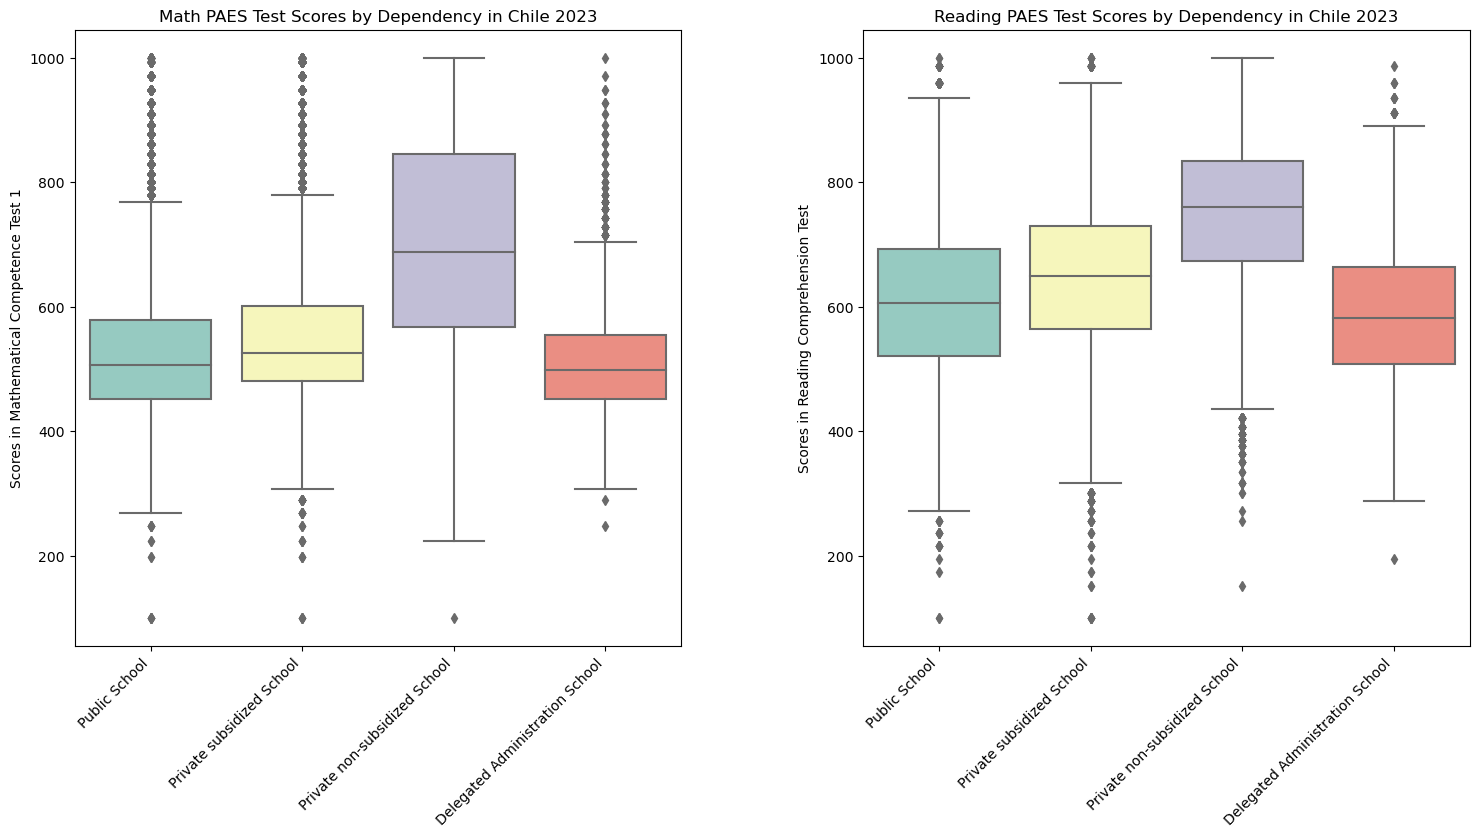

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# MATH TEST
sns.boxplot(
    ax=axes[0],
    x="DEPENDENCY_NAME",
    y="MATE1_REG_ACTUAL",
    data=data,
    order=dependency_order[::-1],
    palette="Set3",
)

axes[0].set_title("Math PAES Test Scores by Dependency in Chile 2023")
axes[0].set_xlabel("")
axes[0].set_ylabel("Scores in Mathematical Competence Test 1")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

# READING TEST
sns.boxplot(
    ax=axes[1],
    x="DEPENDENCY_NAME",
    y="CLEC_REG_ACTUAL",
    data=data,
    order=dependency_order[::-1],
    palette="Set3",
)

axes[1].set_title("Reading PAES Test Scores by Dependency in Chile 2023")
axes[1].set_xlabel("")
axes[1].set_ylabel("Scores in Reading Comprehension Test")
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")


plt.subplots_adjust(wspace=0.3)

plt.show()

>In the graphs above, a marked difference is evident in the scores obtained in university admission tests between students from public schools and those from subsidized and private schools.
>
>In both tests, private schools stand out significantly above other educational institutions, despite showing greater variability in the results. Specifically, private schools exhibit a difference of more than 150 points in the median for mathematics compared to other schools and a difference of over 100 points in reading comprehension.
>
>Furthermore, the most notable disparity is observed in the mathematics test, which is logical as this assessment requires a greater mastery of content.
>
>It is worth noting that subsidized schools, representing the majority of students, fall in an intermediate position in terms of performance between private and public schools. This highlights their mixed nature.

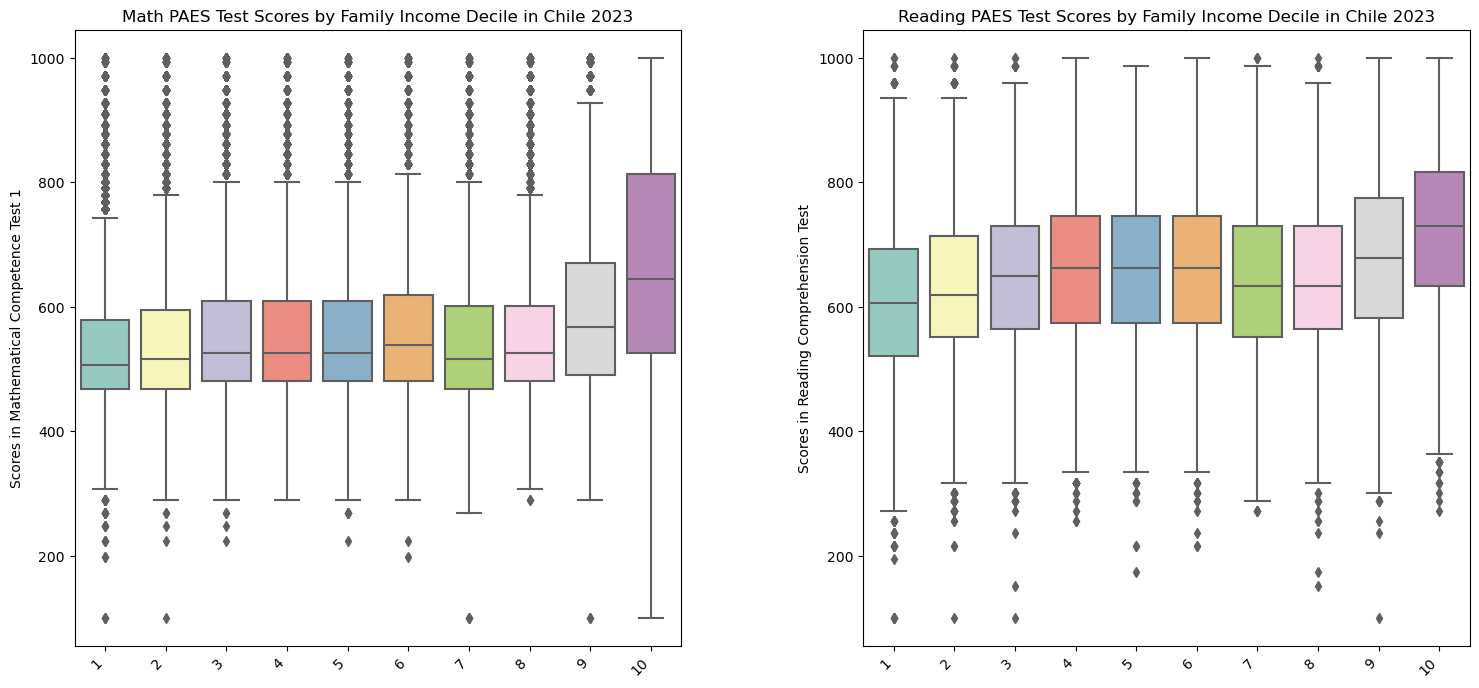

In [42]:
data2 = data[data["INGRESO_PERCAPITA_GRUPO_FA"] != 99]

fig, axes = plt.subplots(1, 2, figsize=(18, 8))


# MATH TEST
sns.boxplot(
    ax=axes[0],
    x="INGRESO_PERCAPITA_GRUPO_FA",
    y="MATE1_REG_ACTUAL",
    data=data2,
    order=data2["INGRESO_PERCAPITA_GRUPO_FA"].sort_values().unique(),
    palette="Set3",
)

axes[0].set_title("Math PAES Test Scores by Family Income Decile in Chile 2023")
axes[0].set_xlabel("")
axes[0].set_ylabel("Scores in Mathematical Competence Test 1")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

# READING TEST
sns.boxplot(
    ax=axes[1],
    x="INGRESO_PERCAPITA_GRUPO_FA",
    y="CLEC_REG_ACTUAL",
    data=data2,
    order=data2["INGRESO_PERCAPITA_GRUPO_FA"].sort_values().unique(),
    palette="Set3",
)

axes[1].set_title("Reading PAES Test Scores by Family Income Decile in Chile 2023")
axes[1].set_xlabel("")
axes[1].set_ylabel("Scores in Reading Comprehension Test")
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

plt.subplots_adjust(wspace=0.3)
plt.show()

>If we analyze the same numbers disaggregated by family income decile, we can see that there are no significant differences for the first 8 deciles. However, the 9th and 10th deciles of the population tend to exhibit a much greater separation from the rest.
>
>Once again, we can observe that the difference in results by socioeconomic level is more pronounced in mathematics.

>### <span style="color: #008080">Conclusions and Future Research</span>
> 
>After exploring the results of the 2023 PAES test, it is evident that it falls short of achieving its initial goal of providing a more equitable tool to facilitate students' access to university. Various challenges related to equity emerge, including notable disparities among different types of educational institutions and socioeconomic strata.
>
>One aspect not addressed in this analysis is the direct comparison between PAES and PSU results in terms of equity in access to higher education. It would be essential to delve into this aspect to assess whether the introduction of PAES has led to significant improvements or if similar challenges persist compared to the previous test. This comparison could shed light on the effectiveness of implemented reforms and provide valuable insights for future educational policies aimed at enhancing equity in access to higher education in Chile.
>
>What remains clear is that we still have a long way to go to ensure true equal opportunities in access to higher education in Chile. The persistence of significant disparities among different student groups and the failure to meet the initial goals of PAES underscore the urgent need to review and adjust current educational policies.


>### <span style="color: #008080">References</span>
>
> Education in Chile: https://en.wikipedia.org/wiki/Education_in_Chile
>
> PAES Database: https://datosabiertos.mineduc.cl/pruebas-de-admision-a-la-educacion-superior/